<a href="https://colab.research.google.com/github/codingwithac/algorithms-and-data-structures/blob/main/image%20classification/Image_classification_(CIFAR_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from tensorflow import keras

# Get the data

In [54]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [55]:
# split the data into training and validation set
x_train = x_train[5000:]
x_validation = x_train[:5000]

y_train = y_train[5000:]
y_validation = y_train[:5000]

In [56]:
# print the shapes
print("x_train: ", x_train.shape)
print("x_validation: ", x_validation.shape)
print("x_test: ", x_test.shape)

x_train:  (45000, 32, 32, 3)
x_validation:  (5000, 32, 32, 3)
x_test:  (10000, 32, 32, 3)


In [57]:
# apply one-hot encoding to the labels
y_train = keras.utils.to_categorical(y_train)
y_validation = keras.utils.to_categorical(y_validation)
y_test = keras.utils.to_categorical(y_test)

# Define the baseline model

In [58]:
# create the baseline model
inputs = keras.Input(shape=(32,32,3))
x = keras.layers.Rescaling(1./255)(inputs)
x = keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", name="1st_conv_layer")(x)
x = keras.layers.MaxPooling2D(pool_size=2, name="1st_pooling_layer")(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", name="2nd_conv_layer")(x)
x = keras.layers.MaxPooling2D(pool_size=2, name="2nd_pooling_layer")(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", name="3rd_conv_layer")(x)
x = keras.layers.MaxPooling2D(pool_size=2, name="3rd_pooling_layer")(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", name="4th_conv_layer")(x)
x = keras.layers.MaxPooling2D(pool_size=2, name="4th_pooling_layer")(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", name="5th_conv_layer")(x)
x = keras.layers.MaxPooling2D(pool_size=2, name="5th_pooling_layer")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation="relu", name="dense_layer")(x)
outputs = keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

baseline_model = keras.Model(inputs=inputs, outputs=outputs, name="baseline_model")

In [59]:
baseline_model.summary()

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_11 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 1st_conv_layer (Conv2D)     (None, 32, 32, 32)        896       
                                                                 
 1st_pooling_layer (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 2nd_conv_layer (Conv2D)     (None, 16, 16, 64)        18496     
                                                                 
 2nd_pooling_layer (MaxPooli  (None, 8, 8, 64)         0         
 ng2D)                                              

# Configure the model

In [60]:
# define the optimizer 
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

baseline_model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Define the callback

In [61]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_baseline_model.keras", save_best_only=True, monitor="val_loss", verbose=1), 
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)]

# Training the model

In [62]:
history = baseline_model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_data=(x_validation, y_validation),callbacks=callbacks)

Epoch 1/10
352/352 [==============================] - ETA: 0s - loss: 1.8710 - accuracy: 0.3143
Epoch 1: val_loss improved from inf to 1.64367, saving model to convnet_baseline_model.keras
352/352 [==============================] - 270s 763ms/step - loss: 1.8710 - accuracy: 0.3143 - val_loss: 1.6437 - val_accuracy: 0.3918
Epoch 2/10
352/352 [==============================] - ETA: 0s - loss: 1.5558 - accuracy: 0.4326
Epoch 2: val_loss improved from 1.64367 to 1.46519, saving model to convnet_baseline_model.keras
352/352 [==============================] - 270s 767ms/step - loss: 1.5558 - accuracy: 0.4326 - val_loss: 1.4652 - val_accuracy: 0.4594
Epoch 3/10
352/352 [==============================] - ETA: 0s - loss: 1.4225 - accuracy: 0.4822
Epoch 3: val_loss improved from 1.46519 to 1.36423, saving model to convnet_baseline_model.keras
352/352 [==============================] - 270s 766ms/step - loss: 1.4225 - accuracy: 0.4822 - val_loss: 1.3642 - val_accuracy: 0.4988
Epoch 4/10
352/352 [

# Plot the result

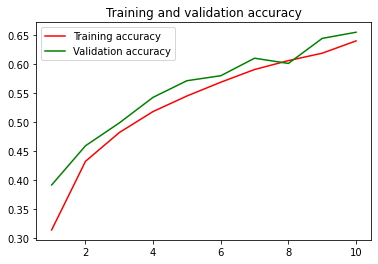

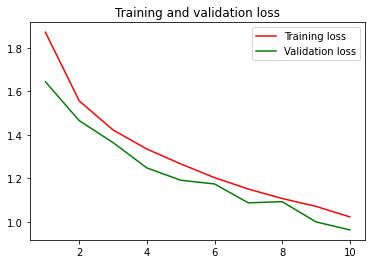

In [64]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, linestyle="solid", color="red", label="Training accuracy")
plt.plot(epochs, val_accuracy, linestyle="solid", color="green", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, linestyle="solid", color="red", label="Training loss")
plt.plot(epochs, val_loss, linestyle="solid", color="green", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()
